In [ ]:
import os
import zipfile

zip_file_path = '/content/drive/MyDrive/ingredients_dataset.zip'
extract_to_path = '/content/drive/MyDrive'

# 압축 해제
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

In [ ]:
%cd /content/drive/MyDrive/ingredients_dataset

# YOLOv5 저장소 클론
!git clone https://github.com/ultralytics/yolov5.git

# YOLOv5 디렉토리로 이동
%cd yolov5

# 필요한 의존성 설치
!pip install -r requirements.txt

/content/drive/MyDrive/ingredients_dataset
fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/drive/MyDrive/ingredients_dataset/yolov5


In [ ]:
!python train.py --img 416 --batch 16 --epochs 300 --data "/content/drive/MyDrive/ingredients_dataset/data.yaml" --cfg ./models/yolov5s.yaml --weights yolov5s.pt --name food_ingredients_model

2024-08-09 14:11:23.854157: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-09 14:11:23.875508: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-09 14:11:23.881990: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=./models/yolov5s.yaml, data=/content/drive/MyDrive/ingredients_dataset/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_w

In [ ]:
import torch

# 사전 훈련된 YOLOv5 모델 로드
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-8-9 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

100%|██████████| 14.1M/14.1M [00:00<00:00, 215MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [ ]:
# 모델 로드
import torch
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/ingredients_dataset/yolov5/runs/train/food_ingredients_model2/weights/best.pt')


/usr/local/lib/python3.10/dist-packages/torch/hub.py:293: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


requirements: Ultralytics requirements ['gitpython>=3.1.30', 'pillow>=10.3.0'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 73.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 182.4 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0

requirements: AutoUpdate success ✅ 3.8s, installed 2 packages: ['gitpython>=3.1.30', 'pillow>=10.3.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



YOLOv5 🚀 2024-8-12 Python-3.10.12 torch-2.3.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7039792 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


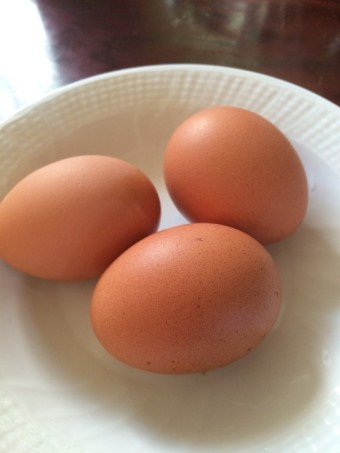

image 1/1: 453x340 3 eggs
Speed: 2.6ms pre-process, 99.4ms inference, 3.1ms NMS per image at shape (1, 3, 640, 480)


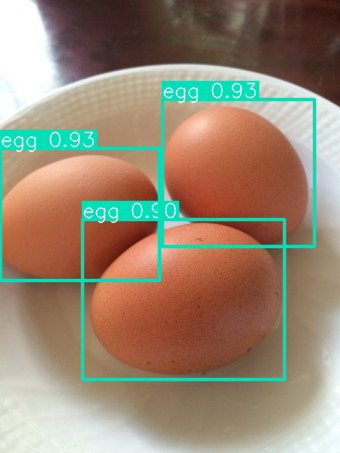

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img_path = '/content/drive/MyDrive/common.jpeg'
img = cv2.imread(img_path)
if img is not None:
    cv2_imshow(img)
else:
    print("Failed to load image.")

# BGR에서 RGB로 변환
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# YOLO 모델로 이미지 분류
results = model(img_rgb)
results.print()
results.show()